# Using Predictive Power Score to Pinpoint Non-linear Correlations


## Correlations
In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense, correlation is any statistical association, although it commonly refers to the degree to which a pair of variables are related linearly. 

Known examples of dependent phenomena include the correlation between the height of parents and their children and the correlation between the price of a good and the quantity that consumers are willing to buy, as represented by the so-called demand curve. Correlations are useful because they can indicate a predictive relationship that can be exploited in practice.

For example, a electric utility may produce less energy on a warm day based on the correlation between electricity demand and climate. In this example, there is a causal relationship because extreme weather causes people to use more electricity to heat or cool themselves

However, in general, the presence of a correlation is not sufficient to infer the presence of a causal relationship (i.e., correlation does not imply causality). Formally, random variables are dependent if they do not satisfy a mathematical property of probabilistic independence. In informal language, correlation is synonymous with dependence.

Essentially, correlation is the measure of how two or more variables relate to each other. There are several correlation coefficients. The most common of these is **Pearson's correlation coefficient**, which is sensitive only to a linear relationship between two variables (which may be present even when one variable is a non-linear function of the other)

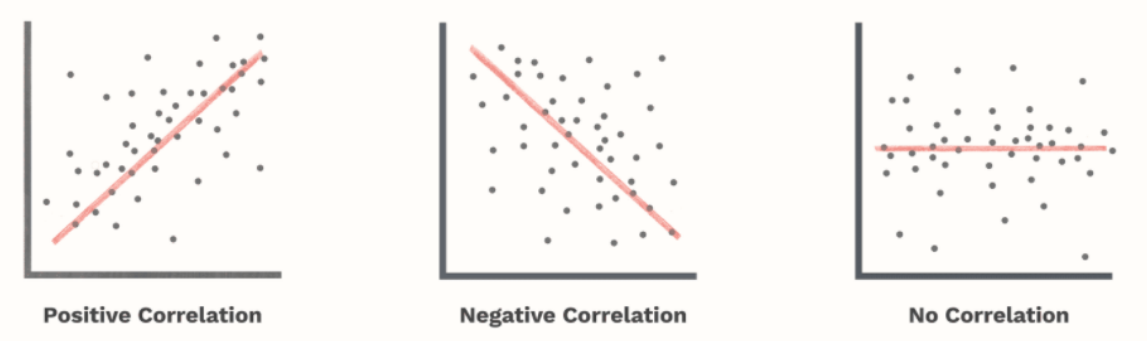

Other correlation coefficients - such as Spearman's range correlation - have been developed to be more robust than Pearson's, i.e. more sensitive to non-linear relationships. Mutual information can also be applied to measure the dependence between two variables. Here we can see correlations with a value of `0`, but that there is indeed some kind of correlation: 

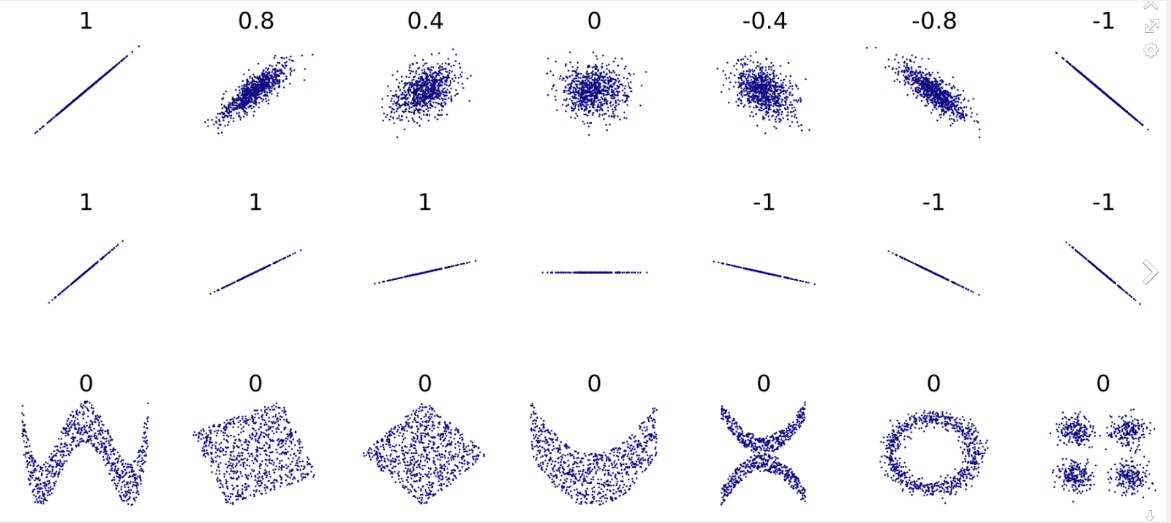

Correlations are scored from -1 to 1 and indicate whether there is a strong linear relationship - either in a positive or negative direction.  However, there are many non-linear relationships that this type of score simply will not detect. In addition, the correlation is only defined for the numerical columns. So, we leave out all the categorical columns.

The same will happen if you transform the categorical columns, because they are not ordinal and if we do `OneHotEncoding` we will end up with an array with many different values (with high cardinality). The symmetry in the correlations means that the correlation is the same whether we calculate the correlation of A and B or the correlation of B and A. However, relationships in the real world are rarely symmetrical. More often, relationships are asymmetrical

A quick example: a column with 2 unique values (`True` or `False` for example) will never be able to perfectly predict another column with `100` unique values. But the opposite could be true. Clearly, asymmetry is important because it is very common in the real world. 

Have you ever asked: 
* Is there a score that tells us if there is any relationship between two columns - no matter if the relationship is linear, non-linear, Gaussian, or some other type of relationship?
* Of course, the score should be asymmetrical because I want to detect all the strange relationships between two variables. 
* The score should be `0` if there is no relationship and the score should be `1` if there is a perfect relationship
* And that the score helps to answer the question Are there correlations between the columns? with a correlation matrix, then you make a scatter plot over the two columns to compare them and see if there is indeed a strong correlation. 
* And like the icing on the cake, the score should be able to handle both categorical and numerical columns by default.

In short, an asymmetric and data-type agnostic score for predictive relationships between two columns ranging from `0` to `1`. Well, there is the Predictive Power Score library and it can be found at the following link: <a href="https://github.com/8080labs/ppscore" target="_blank">Predictive Power Score</a>

So, let's work the library on this notebook!

First we need to install it

In [1]:
!pip3 install ppscore

Processing /home/daniel/.cache/pip/wheels/06/ea/79/902d820a23bad535a7c270bae7ebfb8c798b1d15dde5584442/ppscore-1.1.1-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp36-cp36m-manylinux1_x86_64.whl (6.8 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
You should consider upgrading via the '/home/daniel/Desktop/narrativetext_project/notebooks/bin/python -m pip install --upgrade pip' command.


## Calculating the PPS

First of all, there is no single way to calculate the Predictive Power Score. In fact, there are many possible ways to calculate a score that meets the requirements mentioned above. So, let's rather think of the PPS as a framework for a family of scores. Let's say we have two columns and we want to calculate the PPS of `X` predicting `Y`. In this case, we treat `Y` as our target variable and `X` as our (only) characteristic. 

We can now calculate a cross validated Decision Tree and calculate an appropriate evaluation metric. 
* When the objective is **numerical** we can use a **Regression Decision Tree** and calculate the **Mean Absolute Error (MAE)**. 
* When the objective is **categorical**, we can use a **Classification Decision Tree** and calculate the **weighted F1**

You can also use other scores like **ROC**, etc. but let's leave those doubts aside for a second because we have another problem. Most evaluation metrics do not make sense if you do not compare them to a baseline. It doesn't matter if we have a score of `0.9` if there are possible scores of `0.95`. And it would matter a lot if you are the first person who achieves a score higher than `0.7`. Therefore, we need to "normalize" our evaluation score.  And how do you normalize a score? You define a lower and an upper limit and put the score in perspective

So what should be the upper and lower limits? Let's start with the upper limit because this is usually easier: a perfect `F1` is `1`. A perfect `MAE` is `0`.

But what about the lower limit? Actually, we cannot answer this in absolute terms. The lower limit depends on the evaluation metric and its data set. It is the value reached by a "naïve" predictor.

But what is a naive model? For a classification problem, always predicting the most common class is quite naive. For a regression problem, always predicting the median value is quite naive. 

## PPS VS Correlation

To get a better idea of the PPS and its differences with the correlation let's see this versus. We now have the correlations between `x` and `y` and vice versa 

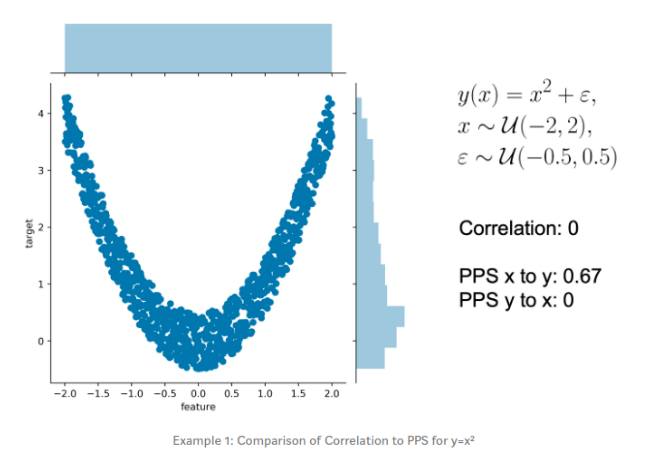

Let's do with this equation from PPS

In [1]:
import pandas as pd
import numpy as np
import ppscore as pps

We've imported Pandas, Numpy and PPS

In [3]:
df = pd.DataFrame()

We've now created an empty Pandas DataFrame

In [4]:
df

""


According to the formula above we need to create the values of features `X`, ranging from `-2` to `+2`, and we do it as a uniform distribution with Numpy, and we'll create `10.000` samples and we assign this values to a new column of the empty dataframe called `X`

Following to the same formula also we will need to create a new column called `error` by assigning the values from `-0.5` to `0.5` as a uniform distribution and with the same number of samples. We will do the same with Numpy

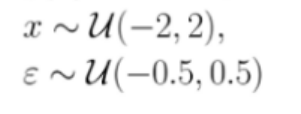

In [5]:
df["x"] = np.random.uniform(-2, 2, 10000)

In [7]:
df.head()

,x
0,-0.233428
1,1.331667
2,1.881335
3,1.980067
4,1.221586


In [8]:
df["error"] = np.random.uniform(-0.5, 0.5, 10000)

In [9]:
df.head()

,x,error
0,-0.233428,-0.005891
1,1.331667,-0.476132
2,1.881335,0.305052
3,1.980067,0.462366
4,1.221586,0.169969


Your data will be different, because is random generated. 

Great! We have the first half of the formula re-created. Now well need to replicate and create `Y`

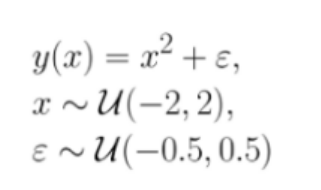

In [10]:
df["y"] = df["x"] * df["x"] + df["error"]

In [11]:
df.head()

,x,error,y
0,-0.233428,-0.005891,0.048597
1,1.331667,-0.476132,1.297206
2,1.881335,0.305052,3.844473
3,1.980067,0.462366,4.383032
4,1.221586,0.169969,1.662242


Very easy, here we follow the formula. Now we want to see the correlations between `X` and `Y`. For this we will use the `.corr()` of Pandas. <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html" target="_blank">For more info here about cor() here</a> . We have two ways to run it: 

* 1- On the column:

In [12]:
df["x"].corr(df["y"])

-0.0115046561021449

* 2- On the DataFrame

In [13]:
df.corr()

,x,error,y
x,1.000000,-0.021072,-0.011505
error,-0.021072,1.000000,0.240056
y,-0.011505,0.240056,1.000000


As we can see, the conclusion we would reach here is that the correlation between `X` and `Y` is not a strong correlation, since the value is `-0.011`, which indicates a slight negative correlation. Remember that a strong positive correlation is equal to `1`, and a strong negative correlation is equal to `-1` (we saw it in the graphs above). But what happens if we execute this same correlation but with Predictive Power Score? Let's do it. Based on the above dataframe we can calculate the PPS of `x` by predicting `y`:

In [14]:
pps.score(df, "x", "y")

{'x': 'x',
 'y': 'y',
 'ppscore': 0.675090383548477,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.025540102508908,
 'model_score': 0.33320784136182485,
 'model': DecisionTreeRegressor()}

Here we obtain a value of `0.67` which is an indicator of a high positive correlation. Using only the Pandas `corr()` we could have lost the predictive power of this variable! Here you can see that this correlation is non-linear

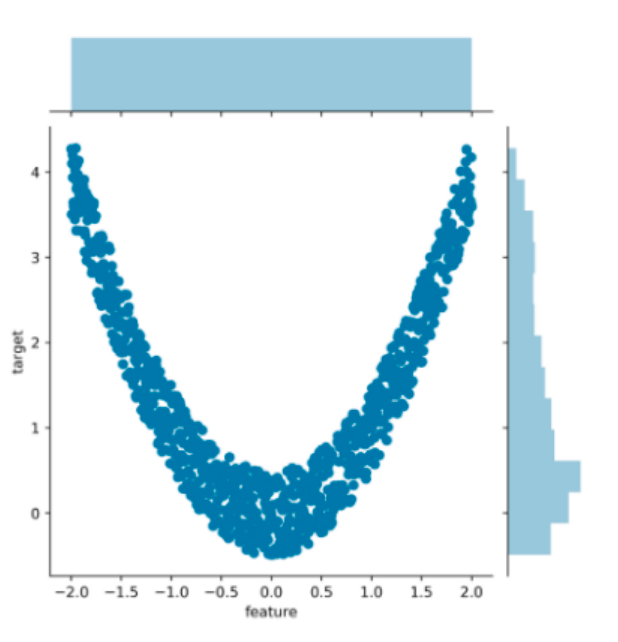

What happens now if we reverse the correlation? Trying to predict `X` based on `Y`? Let's see it

In [15]:
pps.score(df, "y", "x")

{'x': 'y',
 'y': 'x',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.0083196087945172,
 'model_score': 1.1336852173737795,
 'model': DecisionTreeRegressor()}

The correlation is now `0`, so it has no correlation, meaning that we are facing an asymmetric correlation! Let's see more details about the PPS library

In [16]:
pps.predictors(df, "y")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.67509,regression,True,mean absolute error,1.02554,0.333208,DecisionTreeRegressor()
1,error,y,0.00000,regression,True,mean absolute error,1.02554,1.353242,DecisionTreeRegressor()


In [17]:
pps.predictors(df, "x")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,error,x,0,regression,True,mean absolute error,1.00832,1.343184,DecisionTreeRegressor()
1,y,x,0,regression,True,mean absolute error,1.00832,1.133685,DecisionTreeRegressor()


With `.predictors` we can get a clearer idea of what is going on under the hood. In which we can see the metrics and the models used. We can also access the `.matrix` method with the next command

In [18]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.00000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.00000,regression,True,mean absolute error,0.251023,0.333236,DecisionTreeRegressor()
2,x,y,0.67509,regression,True,mean absolute error,1.025540,0.333208,DecisionTreeRegressor()
3,error,x,0.00000,regression,True,mean absolute error,1.008320,1.343184,DecisionTreeRegressor()
4,error,error,1.00000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.00000,regression,True,mean absolute error,1.025540,1.353242,DecisionTreeRegressor()
6,y,x,0.00000,regression,True,mean absolute error,1.008320,1.133685,DecisionTreeRegressor()
7,y,error,0.00000,regression,True,mean absolute error,0.251023,0.279009,DecisionTreeRegressor()
8,y,y,1.00000,predict_itself,True,None,0.000000,1.000000,None


This is how we can calculate the PPS matrix between all columns

# Analizing & visualizing results

We call this non-linear effects and asymmetry. Let's use a typical quadratic relationship: the feature `x` is a uniform variable ranging from `-2` to `2` and the target `y` is the square of `x` plus some `error`. In this case, `x` can predict very well `y` because there is a clear non-linear, quadratic relationship, this is how we generate the data, after all. However, this is not true in the other direction from `y` to `x`. For example, if `y` is 4, it is impossible to predict whether `x` was approximately `2` or `-2`

Therefore, the prediction ratio is asymmetric and the scores should reflect this. What are the values of the scores in this example? If you don't already know what you are looking for, the correlation will leave you hanging because the correlation is `0`. Both from `x` to `y` and from `y` to `x` because the correlation is symmetric

However, the PPS of `x` to `y` is `0.67`, detecting the non-linear relationship and saving the day. However, the PPS is not `1` because there is some error in the relationship. In the other direction, the PPS of `y` to `x` is `0` because its prediction cannot be better than the naive baseline and therefore the score is `0`.

You can use seaborn or your favorite library to view the results.

Viewing PPS predictors:

<AxesSubplot:xlabel='x', ylabel='ppscore'>

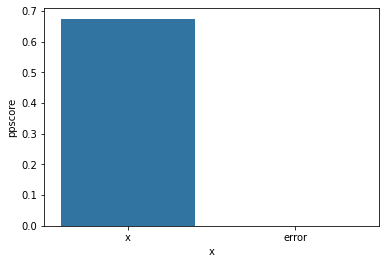

In [19]:
import seaborn as sns
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

Visualizing the PPS matrix:

(This needs some minor pre-processing because `seaborn.heatmap` unfortunately does not accept sorted data)

In [20]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [21]:
matrix_df

x,error,x,y
y,,,
error,1.0,0.00000,0.0
x,0.0,1.00000,0.0
y,0.0,0.67509,1.0


<AxesSubplot:xlabel='x', ylabel='y'>

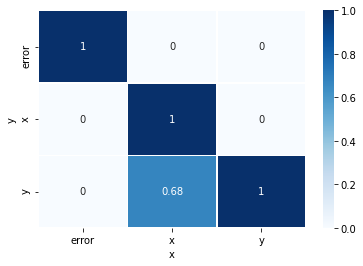

In [22]:
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

It is clear, with this visualization, that we are having a good result with the correlation between `x` and `y`, but not in the opposite way. 

## Example with Categorical Features

Comparing the correlation matrix with the PPS matrix of the Titanic data set will give you some new ideas.

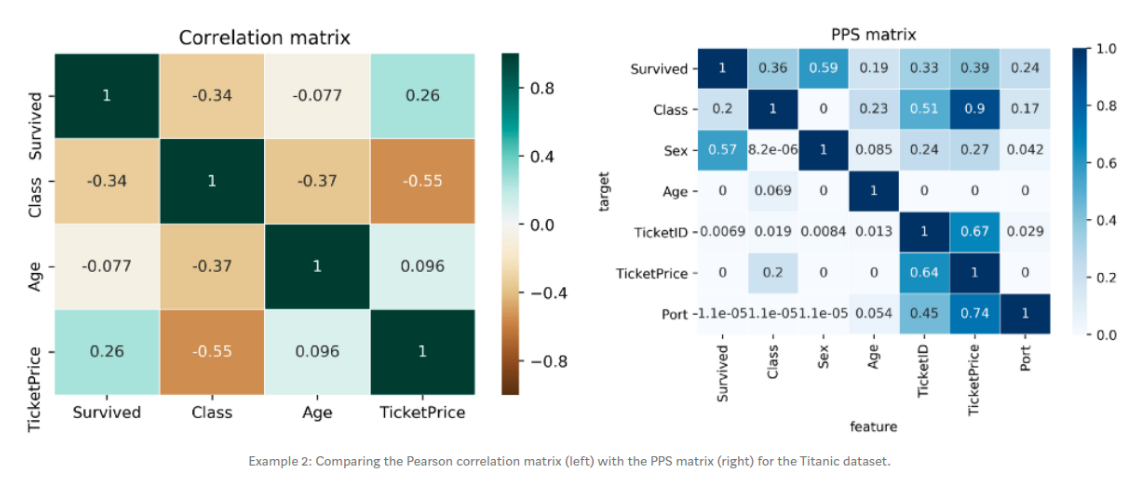

The correlation matrix is smaller and leaves out many interesting relationships. Of course, that makes sense because columns like `Sex`, `TicketID` or `Port` are categorical and the correlation cannot be computed for them. The correlation matrix shows a negative correlation between `TicketPrice` and `Class` `(-0.55)`

We can check this relationship if we take a look at the PPS. We will see that the `TicketPrice` is a strong predictor for the `Class` `(0.9 PPS)` but not the other way around. The `Class` feature only predicts the `TicketPrice` with a PPS of `0.2`

This makes sense because if your ticket cost $5,000 or $10,000 it's most likely in the higher class. Conversely, if you know someone was in the highest class you can't tell whether they paid $5,000 or $10,000 for their ticket. In this scenario, the asymmetry of the PPS shines through again.

The first row of the matrix tells you that the best univariate predictor of the `"Survived"` column is the `"Sex"` column. This makes sense because women were prioritized during the rescue. (We could not find this information in the correlation matrix because the `Sex` column was eliminated).

If you look at the `TicketID` column, you can see that `TicketID` is a pretty good predictor for a range of columns. If you dig deeper into this pattern, you will discover that several people had the same `TicketID`.  Therefore, the `TicketID` actually refers to a latent group of passengers who bought the ticket together, for example the big Italian family Rossi who turns any night into a show. Thus, the PPS helped you to detect a hidden pattern.

What's even more surprising than the strong predictive power of `TicketID` is the strong predictive power of `TicketPrice` across a wide range of columns. Especially, the fact that `TicketPrice` is quite good at predicting `TicketID (0.67)` and vice versa `(0.64)`

Upon further investigation, you will discover that the tickets were often uniquely priced. For example, only the Italian Rossi family paid a price of $72.50. This is a critical view! It means that the `TicketPrice` contains information about the `TicketID` and therefore about our Italian family. Information that you need to have when you consider a possible leakage of information.

By looking at the PPS matrix, we can see the effects that could be explained by the causal chains. For example, you would be surprised why `TicketPrice` has a predictive power on the survival rate `(PPS 0.39)`. But if you know that the `Class` influences your survival rate `(PPS 0.36)` and that `TicketPrice` is a good predictor for your `Class (PPS 0.9)`, then you might have found an explanation

## Disclosure

PPS clearly has some advantages over correlation in finding predictive patterns in the data. However, once patterns are found, correlation is still a great way to communicate the linear relationships found. Therefore, you can use the PPS matrix as an alternative to the correlation matrix to detect and understand linear or non-linear patterns in your data

## Limitations

* The calculation is slower than the correlation (matrix).
* The score cannot be interpreted as easily as the correlation because it does not tell you anything about the type of relationship that was found. Therefore, the PPS is better at finding patterns but the correlation is better at communicating the linear relationships found.
* You cannot compare the scores of different target variables in a strictly mathematical way because they are calculated using different evaluation metrics. Scores are still valuable in the real world, but this must be kept in mind.
* There are limitations to the components used under the hood

## Conclusions
* In addition to your usual feature selection mechanism, you can use the PPS to find good predictors for your target column.
* You can also remove features that only add random noise. 
* Those features sometimes still score high on the feature importance metric.
* You can remove features that can be predicted by other features because they do not add new information
* You can identify pairs of mutually predictive characteristics in the PPS matrix - this includes strongly correlated characteristics but will also detect non-linear relationships.
* Detect leakage: Use the PPS matrix to detect leakage between variables - even if the leakage is mediated by other variables.
* Data normalization: Find entity structures in the data by interpreting the PPS matrix as a directed graph. This can be surprising when the data contain latent structures that were previously unknown. For example: the TicketID in the Titanic data set is often a flag for a

## References
This notebook was inspired by the library and by this <a href="https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598" target="_blank">post</a>.

I have written this other <a href="https://www.narrativetext.co/data-science-publications/data-hub/data-science-notebooks/how-to-use-python-datetimes-correctly" target="_blank">Notebook about Datetimes in Python</a>. I invite you to read it!

Hope you enjoyed the reading!